### Music Genre Detection

In [ ]:
#install all libraries outlined in requirements file
!pip install -r requirements.txt

fatal: could not read Username for 'https://github.com': No such device or address


In [20]:
#import required modules
import torch
import torchaudio
import torchaudio.transforms as tt
import matplotlib.pyplot as plt
import os

In [2]:
#Set up folder directory structure
path = '/content/Music-Genre-Detection'
if not os.path.exists(path):
  %mkdir -p /content/Music-Genre-Detection

%cd /content/Music-Genre-Detection

/content/Music-Genre-Detection


In [3]:
data = torchaudio.datasets.GTZAN(root='.',url = 'http://opihi.cs.uvic.ca/sound/genres.tar.gz', folder_in_archive= 'genres', download= True, subset=None)

  0%|          | 0.00/1.14G [00:00<?, ?B/s]

In [7]:
data_loader = torch.utils.data.DataLoader(data,
                                          batch_size=1,
                                          shuffle=True,
                                          num_workers=1)

In [32]:
waveform, samplerate,label = next(iter(data_loader))
print(f"The shape of waveform is {waveform[0].shape}, sampling rate {samplerate[0]} and genre is {label[0]}.")

The shape of waveform is torch.Size([1, 661794]), sampling rate 22050 and genre is metal.


In [33]:
w = waveform[0]

In [39]:
samplerate.item()

22050

shape of spectogram torch.Size([1, 201, 3309])


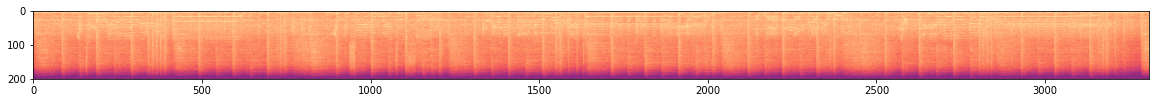

In [34]:
specgram=tt.Spectrogram()(w)
print("shape of spectogram {}".format(specgram.size()))

plt.figure(figsize=(20, 5))
plt.imshow(specgram.log2()[0,:,:].numpy(),cmap='magma')

In [29]:
next(iter(data_loader))[2][0]

'reggae'

In [35]:
import IPython


In [40]:
IPython.display.Audio(w,rate=samplerate.item())
